# Iceberg Tutorial!!

This notebook is a tutorial for how to use the iceberg library and idioms for various tasks. Make sure you have the iceberg library installed before running this notebook.

In [1]:
import iceberg as ice

## Basics

Let's start by creating some simple diagrams. First, let's create a rectangle and add some padding to it.

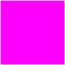

In [2]:
rectangle = ice.Rectangle(ice.Bounds.from_size(64, 64), fill_color=ice.Colors.MAGENTA)
rectangle

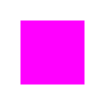

In [3]:
rectangle.pad(20)

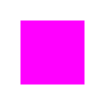

In [4]:
rectangle.pad(20).background(ice.Colors.WHITE)

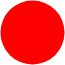

In [5]:
ball = ice.Ellipse(rectangle=ice.Bounds.from_size(64, 64), fill_color=ice.Colors.RED)
ball

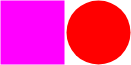

In [6]:
ice.Arrange(rectangle, ball, arrange_direction=ice.Arrange.Direction.HORIZONTAL)

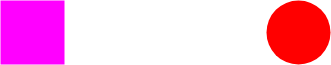

In [7]:
ice.Arrange(rectangle.pad_right(200), ball, arrange_direction=ice.Arrange.Direction.HORIZONTAL)

Let's add an arrow that points from the rectangle to the circle!

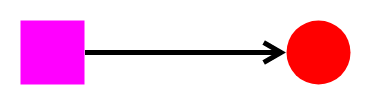

In [8]:
arrangement = ice.Arrange(rectangle.pad_right(200), ball, arrange_direction=ice.Arrange.Direction.HORIZONTAL)

with arrangement:
    arrow = ice.Arrow(
        rectangle.relative_bounds.corners[ice.Corner.MIDDLE_RIGHT],
        ball.relative_bounds.corners[ice.Corner.MIDDLE_LEFT],
        line_path_style=ice.PathStyle(ice.Colors.BLACK, 5)
    )

ice.Compose(arrangement, arrow).pad(20).background(ice.Colors.WHITE)

Let's animate the arrow going from left to right!

100%|██████████| 50/50 [00:00<00:00, 158.88it/s]



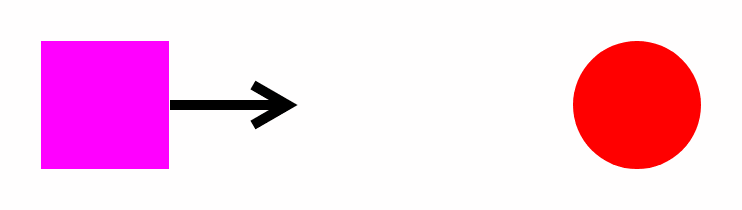

In [9]:
class Animation(ice.Playbook):
    def timeline(self):
        arrangement = ice.Arrange(rectangle.pad_right(200), ball, arrange_direction=ice.Arrange.Direction.HORIZONTAL)

        with arrangement:
            arrowA = ice.Arrow(
                rectangle.relative_bounds.corners[ice.Corner.MIDDLE_RIGHT],
                ball.relative_bounds.corners[ice.Corner.MIDDLE_LEFT],
                line_path_style=ice.PathStyle(ice.Colors.BLACK, 5),
                partial_end=0.3
            )

            arrowB = ice.Arrow(
                rectangle.relative_bounds.corners[ice.Corner.MIDDLE_RIGHT],
                ball.relative_bounds.corners[ice.Corner.MIDDLE_LEFT],
                line_path_style=ice.PathStyle(ice.Colors.BLACK, 5),
                partial_end=1
            )

            arrow = ice.Animated([arrowA, arrowB], 1.0)

        scene = ice.Compose(arrangement, arrow).pad(20).background(ice.Colors.WHITE).scale(2)
        self.play(scene)

Animation().ipython_display(display_format="gif")

## Creating Your Own Modules

Iceberg is designed to be modular. You can create your own modules, or as we call them, "drawables". All iceberg drawables are dataclasses (very much inspired from `flax.nn.Module`).

We can either inherit from `ice.Drawable`, but it is often easier to inherit from `ice.DrawableWithChild` and perform all the required operations in the `setup` method.

Let's create a simple drawable that draws a circle.

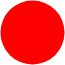

In [10]:
from typing import Tuple


class Ball(ice.DrawableWithChild):
    radius: float
    center: Tuple[float, float] = (0, 0)
    fill_color: ice.Color = ice.Colors.RED

    def setup(self):
        cx, cy = self.center
        left, top, right, bottom = (
            cx - self.radius,
            cy - self.radius,
            cx + self.radius,
            cy + self.radius,
        )
        internal_ball = ice.Ellipse(
            rectangle=ice.Bounds(left, top, right, bottom), fill_color=self.fill_color
        )

        self.set_child(internal_ball)


Ball(radius=32)